In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])



large=12
med=9
small=6
ss=10
sss=8
ssss=6



matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600

matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss



matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5



matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8


#matplotlib.rcParams['xtick.direction'] = 'in'

In [3]:

data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [4]:

#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

In [5]:

X_train = data_train.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M', 'Formation_Energy'], axis=1)
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M', 'Formation_Energy'], axis=1)
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M', 'Formation_Energy'], axis=1)
y_final_test = data_final_test.iloc[:,0]

In [6]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [7]:
X_train_standard

,Mo_P,Ru_P,Rh_P,W_P,Ir_P,S_MIX,H_MIX
0,-0.987393,1.477909,-0.393018,0.866900,-0.947659,0.187799,0.649940
1,0.893355,0.223450,-0.393018,0.253165,-0.947659,1.315755,-0.422817
2,0.893355,-0.403779,0.839979,-0.360569,-0.947659,1.043415,-0.398436
3,-0.987393,-0.403779,-0.393018,1.480634,0.270216,0.826387,-0.166818
4,-0.987393,0.850680,-0.393018,-0.974303,1.488091,0.187799,1.259461
...,...,...,...,...,...,...,...
155,1.520272,-1.031008,0.223481,-1.588038,0.879154,-0.742426,-1.489479
156,0.893355,-1.658237,0.223481,-0.360569,0.879154,0.113190,-1.355384
157,1.520272,-1.658237,-1.009516,0.253165,0.879154,-0.742426,-1.751573
158,-1.614309,-0.403779,0.839979,1.480634,-0.338721,-0.376178,0.820606


In [8]:

X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

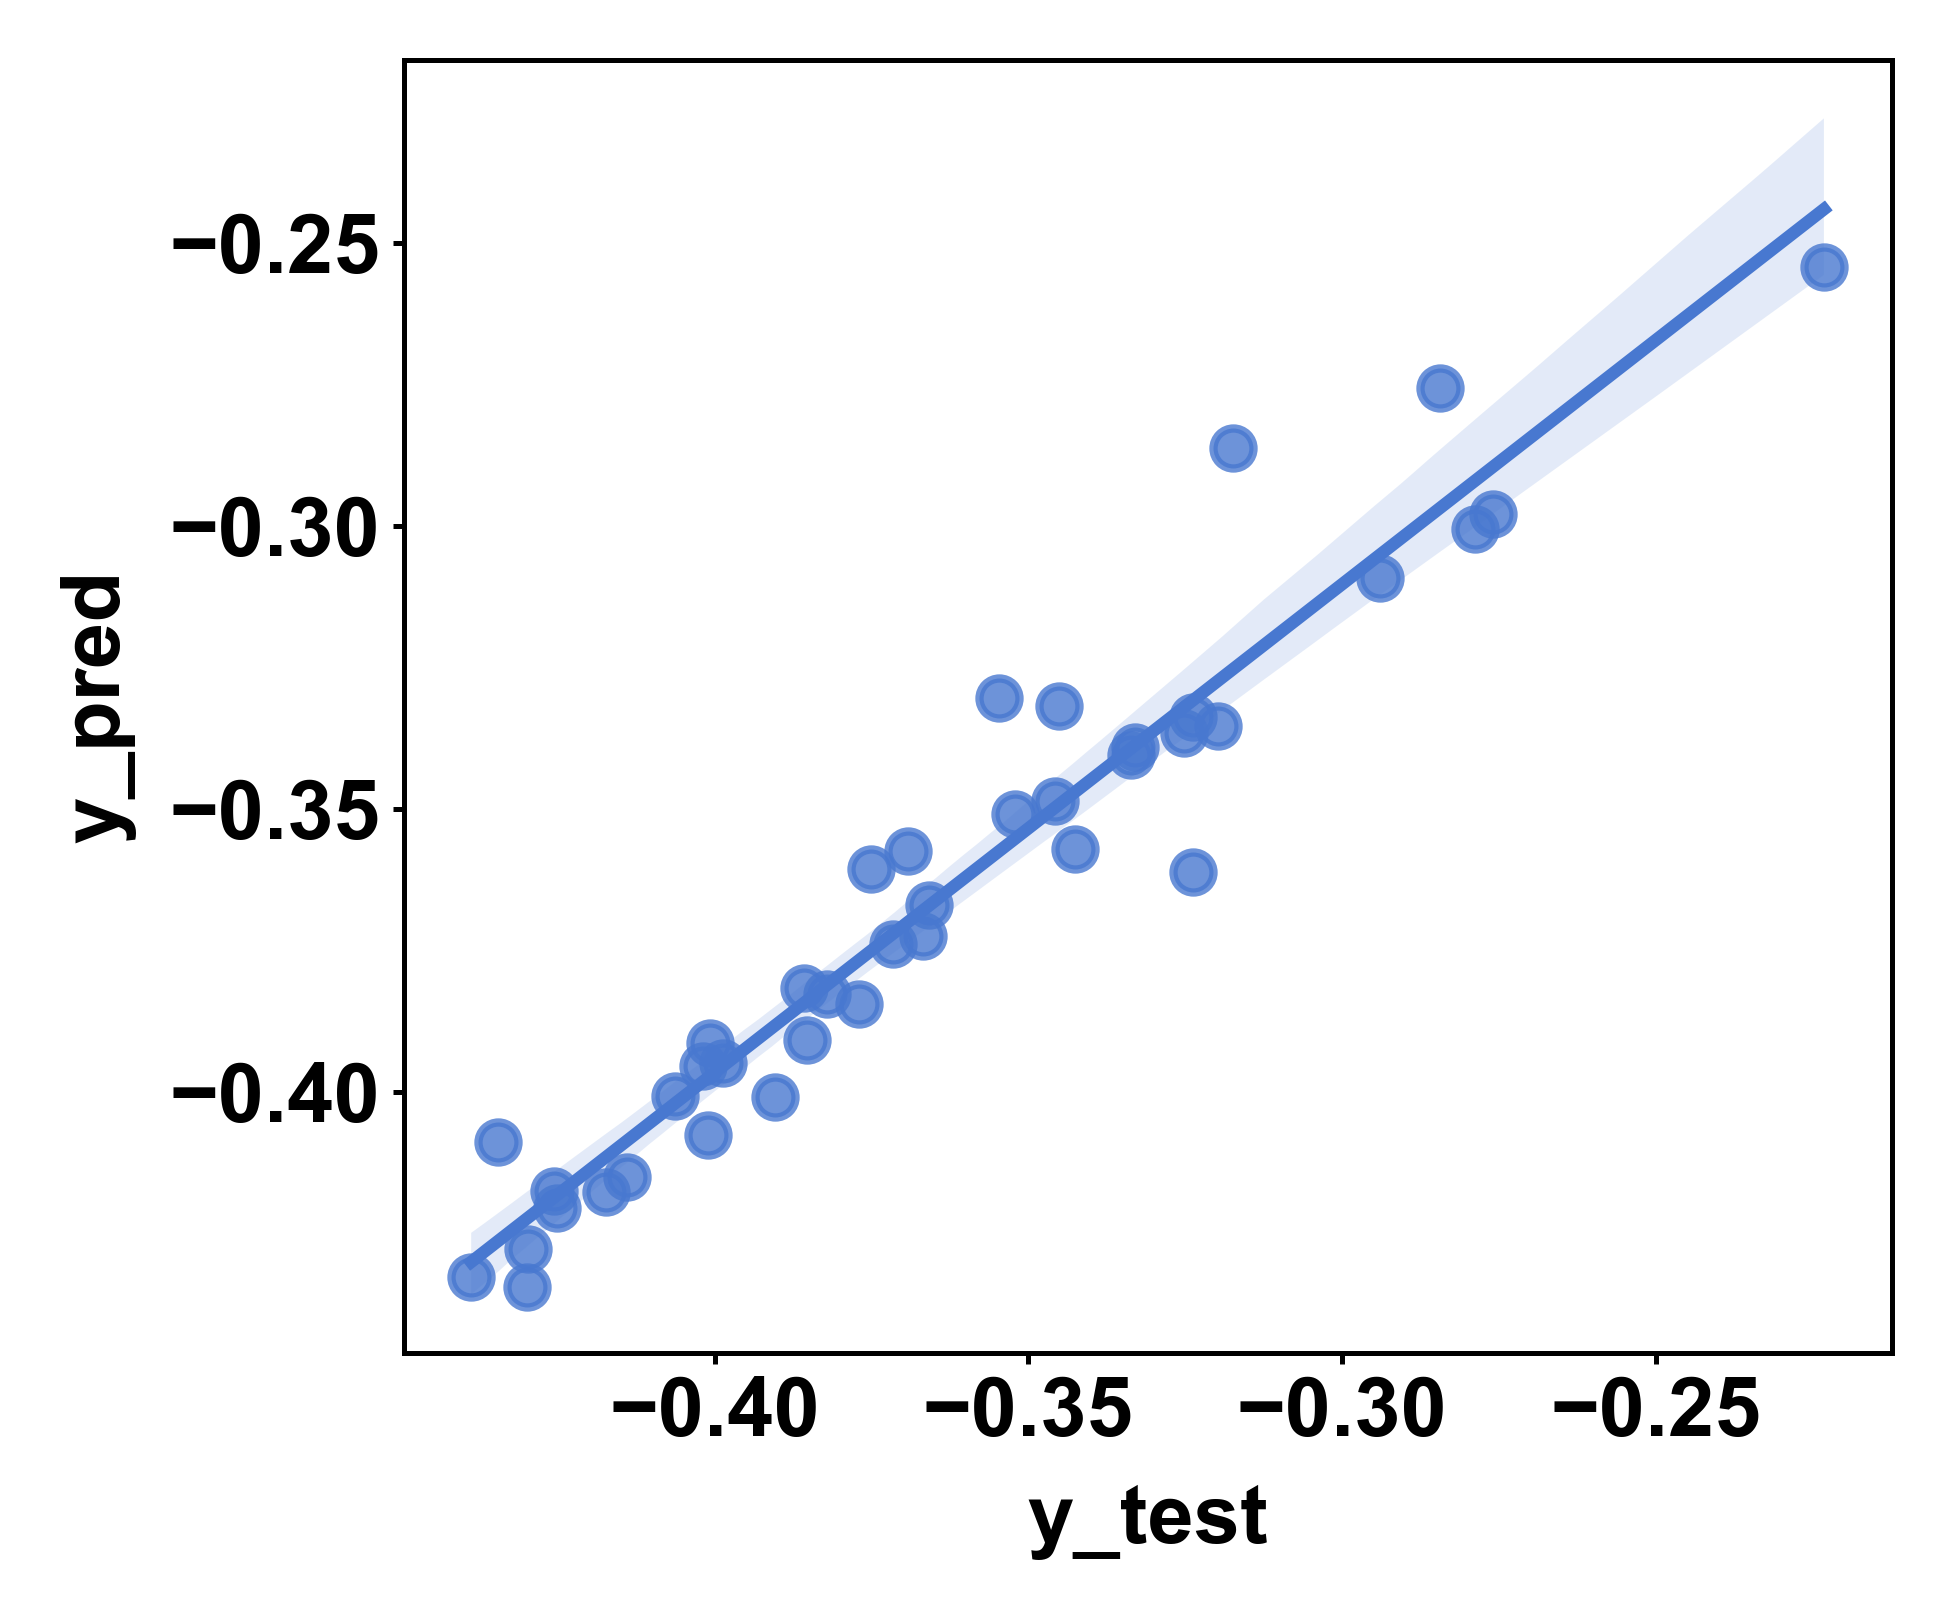

Mean Absolute Error MAE: 0.010515298026847747
test rmse scores :  0.013910443704355659
test R2 scores :  0.9224007747646209


In [9]:

from xgboost import XGBRegressor


XGB_default = XGBRegressor(objective='reg:squarederror', random_state=1)
XGB_default.fit(X_train_standard_np, y_train_np)
y_pred_default = XGB_default.predict(X_test_standard_np)


x_1 = pd.Series(y_test_np, name='y_test')
y_1 = pd.Series(y_pred_default, name='y_pred')
sns.regplot(x=x_1, y=y_1)
plt.show()


mae = mean_absolute_error(y_test_np, y_pred_default)
rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_default))
r2 = r2_score(y_test_np, y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [10]:
print(XGB_default.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


XGB_GS = xgb.XGBRegressor(objective='reg:squarederror',random_state=1,n_jobs=-1)


param_grid = {
    'n_estimators': [600,700],   
    'learning_rate': [0.05,0.1],  
    'max_depth': [1,2],     
    'min_child_weight': [1,2],  
    'gamma': [0, 0.1],         
    'subsample': [0.6,0.8],     
    'colsample_bytree': [0.4,0.6], 
    'reg_alpha': [0, 0.1], 
    'reg_lambda': [0.3,0.4]  
}


gs = GridSearchCV(
    estimator=XGB_GS,
    param_grid=param_grid,
    scoring='r2',
    cv=5,           
    n_jobs=-1,   
    verbose=2             
)



gs.fit(X_train_standard_np, y_train_np)

print(gs.best_score_)
print(gs.best_params_)

ne_v=gs.best_params_['n_estimators']
lr_v=gs.best_params_['learning_rate']
md_v=gs.best_params_['max_depth']
mcw_v=gs.best_params_['min_child_weight']
ga_v=gs.best_params_['gamma']
su_v=gs.best_params_['subsample']
cb_v=gs.best_params_['colsample_bytree']
ra_v=gs.best_params_['reg_alpha']
rl_v=gs.best_params_['reg_lambda']

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
0.9599440683464954
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 700, 'reg_alpha': 0, 'reg_lambda': 0.4, 'subsample': 0.8}


In [12]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold


XGB_KF = xgb.XGBRegressor(n_estimators=ne_v, learning_rate=lr_v, max_depth=md_v, min_child_weight=mcw_v, gamma=ga_v,
                          subsample=su_v, colsample_bytree=cb_v, reg_alpha=ra_v, reg_lambda=rl_v, random_state=1)


kf = KFold(n_splits=5)


rmse_scores = []
r2_scores = []
mae_scores = []
feature_imp_set=[]  


for train_indices, test_indices in kf.split(X_train_standard_np):
    X_train_k, X_test_k = X_train_standard_np[train_indices], X_train_standard_np[test_indices]
    y_train_k, y_test_k = y_train_np[train_indices], y_train_np[test_indices]
    XGB_KF.fit(X_train_k,y_train_k)
    y_pred_k=XGB_KF.predict(X_test_k)
    feature_imp=XGB_KF.feature_importances_
    feature_imp_set.append(feature_imp)

    rmse = np.sqrt(mean_squared_error(y_test_k,y_pred_k))
    rmse_scores.append(rmse)
    r2 = r2_score(y_test_k,y_pred_k)
    r2_scores.append(r2)
    mae = mean_absolute_error(y_test_k,y_pred_k)
    mae_scores.append(mae)


print (feature_imp_set)
print ('mae scores : ',mae_scores)
print (f'average mae score : {np.mean(mae_scores)}')    
print ('rmse scores : ',rmse_scores)
print (f'average rmse score : {np.mean(rmse_scores)}')
print ('R2 scores : ',r2_scores)
print (f'average R2 score : {np.mean(r2_scores)}')

[array([0.04148863, 0.5737657 , 0.04320011, 0.10894004, 0.07299332,
       0.0099387 , 0.14967346], dtype=float32), array([0.03902406, 0.5917556 , 0.02650711, 0.09353728, 0.08876157,
       0.01922055, 0.14119378], dtype=float32), array([0.03758115, 0.5477386 , 0.05031196, 0.10659093, 0.09618523,
       0.01141633, 0.15017584], dtype=float32), array([0.03826179, 0.5759909 , 0.02616247, 0.13250272, 0.06984493,
       0.01447973, 0.14275733], dtype=float32), array([0.03684096, 0.48818412, 0.04145583, 0.14756986, 0.11033107,
       0.01609282, 0.15952533], dtype=float32)]
mae scores :  [0.004065152947330836, 0.0057671760541574, 0.006968799378856524, 0.007259132236864574, 0.0056041279433344925]
average mae score : 0.005932877712108766
rmse scores :  [0.005150818544008551, 0.007427031042761089, 0.009341321713944825, 0.009185665469495428, 0.00691472310248067]
average rmse score : 0.007603911974538112
R2 scores :  [0.9801795428497723, 0.9617550003568072, 0.9377171402007302, 0.9514643058000527

In [13]:

data = pd.read_excel('data_final.xlsx')


#data = data.astype(float)
#data.info()


X_all = data.drop(['AVE_R', 'AVE_E', 'AVE_M', 'MSD_R', 'MSD_E', 'MSD_M', 'Formation_Energy'], axis=1)
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
XGB_all = xgb.XGBRegressor(n_estimators=ne_v, learning_rate=lr_v, max_depth=md_v, min_child_weight=mcw_v, gamma=ga_v,
                           subsample=su_v, colsample_bytree=cb_v, reg_alpha=ra_v, reg_lambda=rl_v, random_state=1)


feature_imp_set=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20


for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    
    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    XGB_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = XGB_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse)
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = XGB_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = XGB_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)

    feature_imp=XGB_all.feature_importances_
    feature_imp_set.append(feature_imp)


results_dict = {
    'method': ['XGB'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_7fea.xlsx'
results_df.to_excel(excel_filename, index=False)  

In [15]:

print('train set')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')


print('\nDataFrame preview:')
print(results_df.head())



print('best test set')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('best independent test set')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set
Average MAE score: 0.0021 ± 0.0001
Average RMSE score: 0.0027 ± 0.0001
Average R2 score: 0.9956 ± 0.0004

test set
Average MAE score: 0.0060 ± 0.0008
Average RMSE score: 0.0078 ± 0.0011
Average R2 score: 0.9633 ± 0.0128

independent test set
Average MAE score: 0.0080 ± 0.0005
Average RMSE score: 0.0097 ± 0.0006
Average R2 score: 0.8645 ± 0.0154

Results have been saved to model_evaluation_results_7fea.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0    XGB    Train  0.002146  0.002744  0.995277
1    XGB    Train  0.002028  0.002525  0.995599
2    XGB    Train  0.002151  0.002762  0.995209
3    XGB    Train  0.002304  0.002869  0.994833
4    XGB    Train  0.001923  0.002445  0.996134
best test set
min MAE score: 0.00479967673582593      random_state= 8
min RMSE score: 0.006205768578810952      random_state= 10
max R2 score: 0.9789240335058442      random_state= 0
best independent test set
min MAE score: 0.006952407950715675      random_state= 18
min R

train Mean Absolute Error MAE: 0.0020819304115583387
train rmse scores :  0.002741023127336801
train R2 scores :  0.9956993924832407


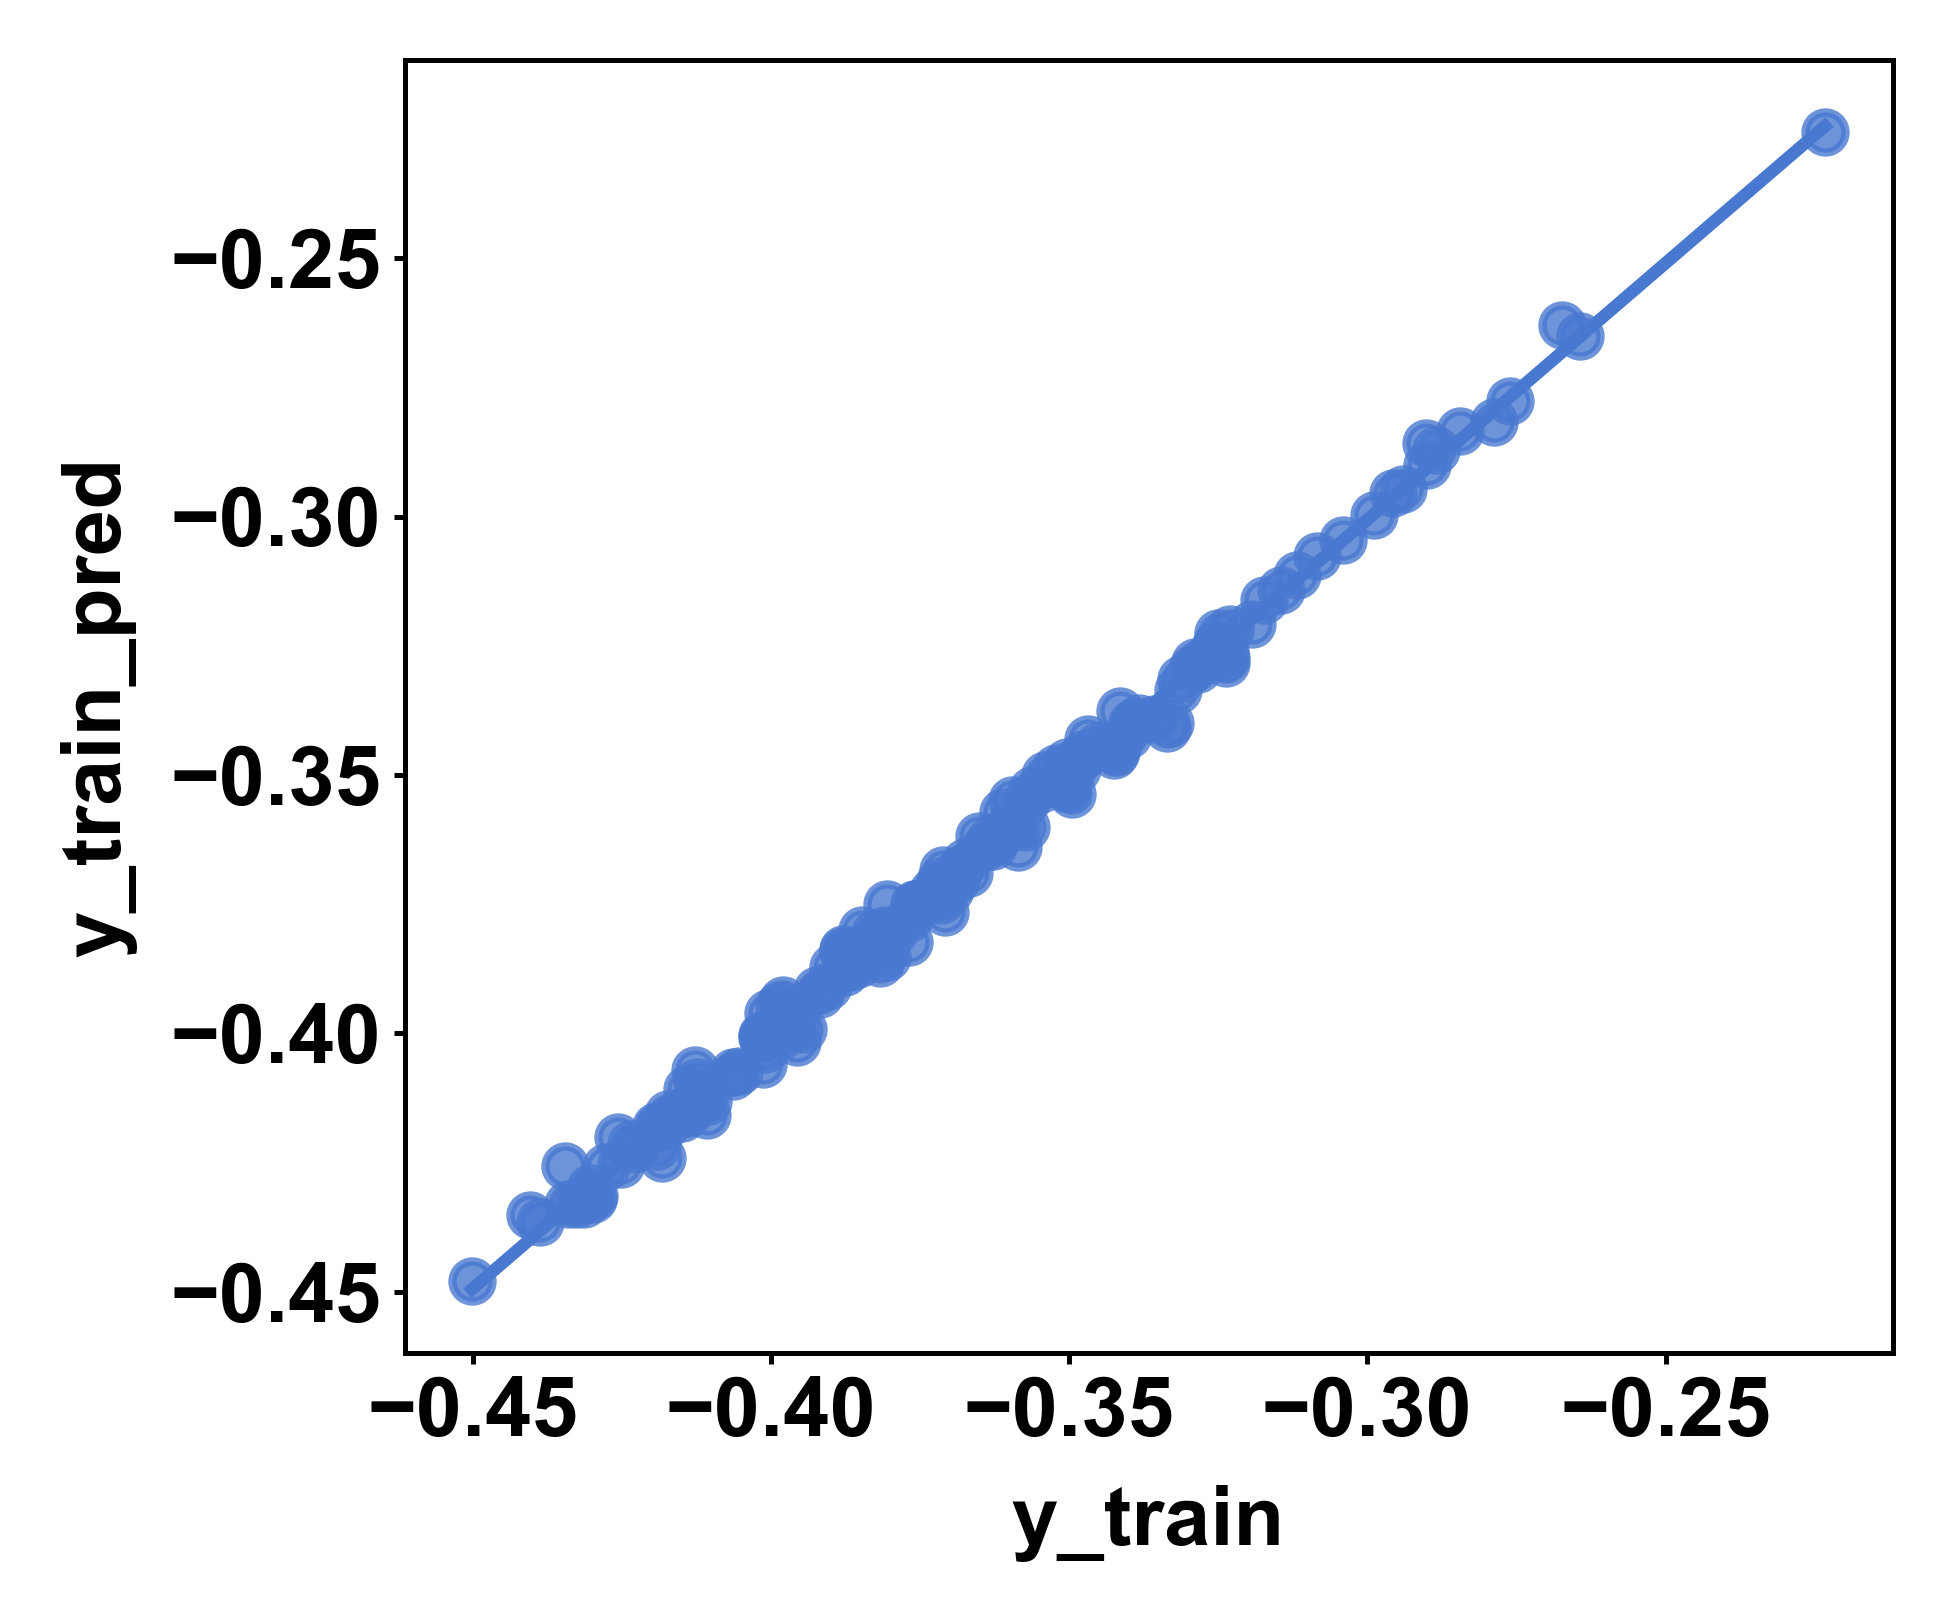

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_index=final_max_r2_index

X_train_best,X_test_best,y_train_best,y_test_best = train_test_split(X_all,y_all,test_size=0.2,shuffle=True,random_state=max_index) 


scaler_best = StandardScaler()
scaler_best.fit(X_train_best)
X_train_best_standard = scaler_best.transform(X_train_best)
X_test_best_standard = scaler_best.transform(X_test_best)
X_final_test_standard_best = scaler_best.transform(X_final_test)


XGB_best = xgb.XGBRegressor(n_estimators=ne_v, learning_rate=lr_v, max_depth=md_v, min_child_weight=mcw_v, gamma=ga_v,
                            subsample=su_v, colsample_bytree=cb_v, reg_alpha=ra_v, reg_lambda=rl_v, random_state=1)
XGB_best.fit(X_train_best_standard, y_train_best)
y_train_best_pred=XGB_best.predict(X_train_best_standard)

x_best_1,y_best_1=pd.Series(y_train_best,name='y_train'),pd.Series(y_train_best_pred,name='y_train_pred')
sns.regplot(x=x_best_1,y=y_best_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_train_best, y_train_best_pred))
r2 = r2_score(y_train_best, y_train_best_pred)


print(f'train Mean Absolute Error MAE: {mean_absolute_error(y_train_best,y_train_best_pred)}')
print ('train rmse scores : ',rmse)
print ('train R2 scores : ',r2)

test Mean Absolute Error MAE: 0.00479967673582593
test rmse scores :  0.006543493583811577
test R2 scores :  0.9671574512744854


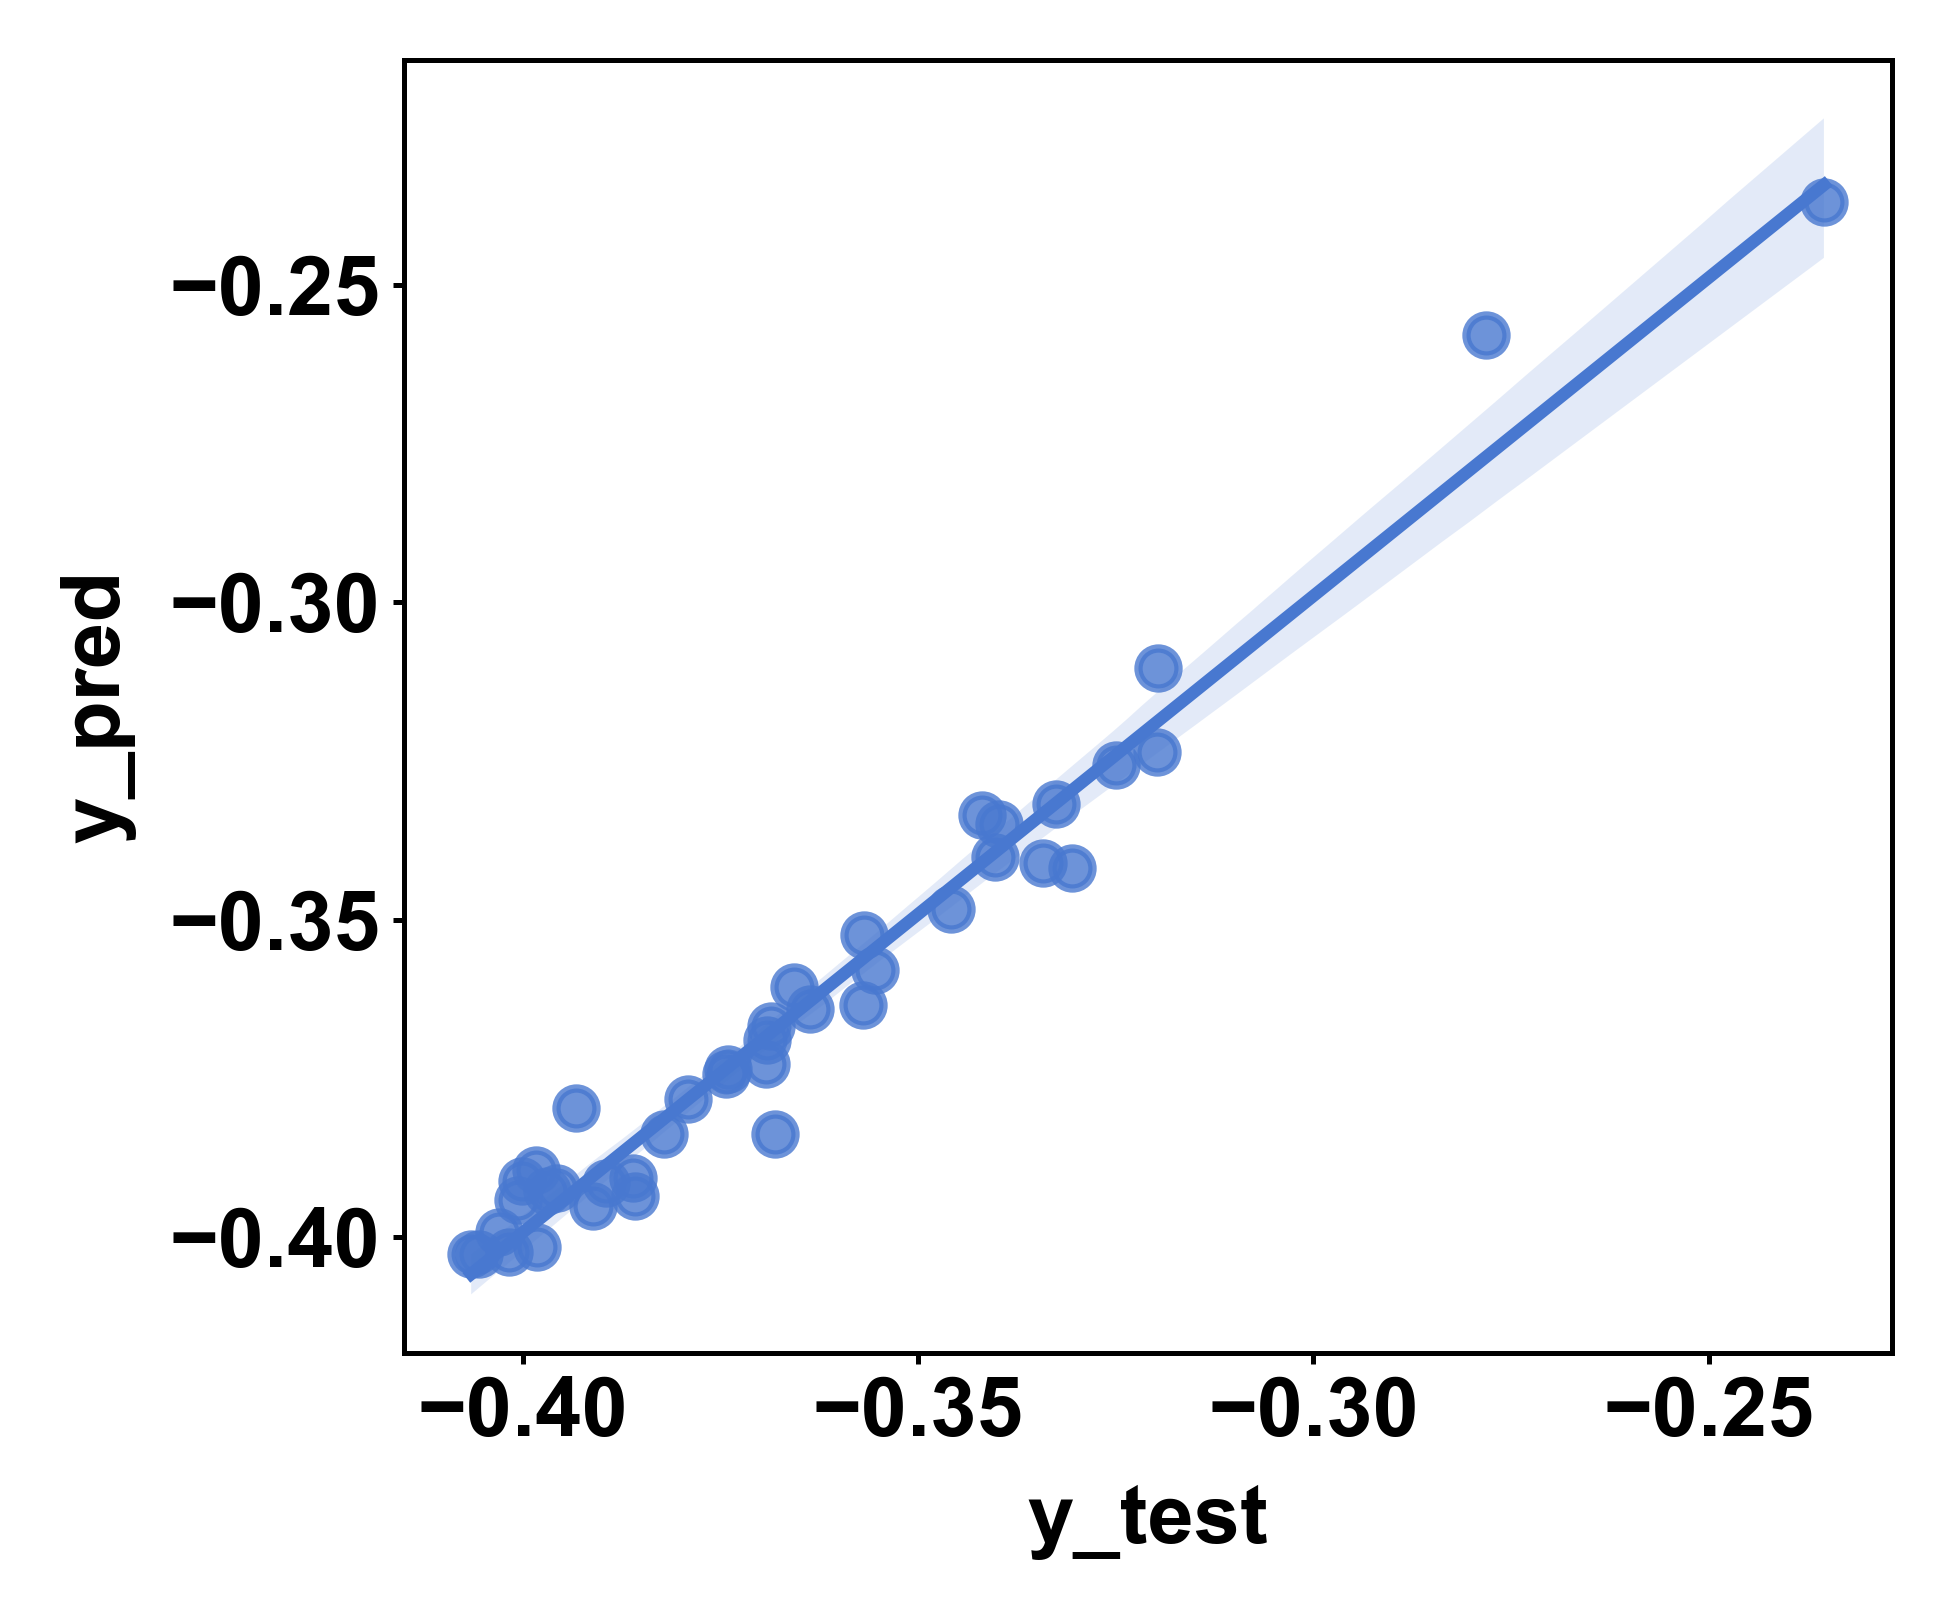

In [17]:

y_test_best_pred=XGB_best.predict(X_test_best_standard)


x_best_2,y_best_2=pd.Series(y_test_best,name='y_test'),pd.Series(y_test_best_pred,name='y_pred')
sns.regplot(x=x_best_2,y=y_best_2)
plt.show

rmse = np.sqrt(mean_squared_error(y_test_best,y_test_best_pred))
r2 = r2_score(y_test_best,y_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_test_best,y_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

test Mean Absolute Error MAE: 0.0069765267251227945
test rmse scores :  0.00856109962759086
test R2 scores :  0.8946098451315229


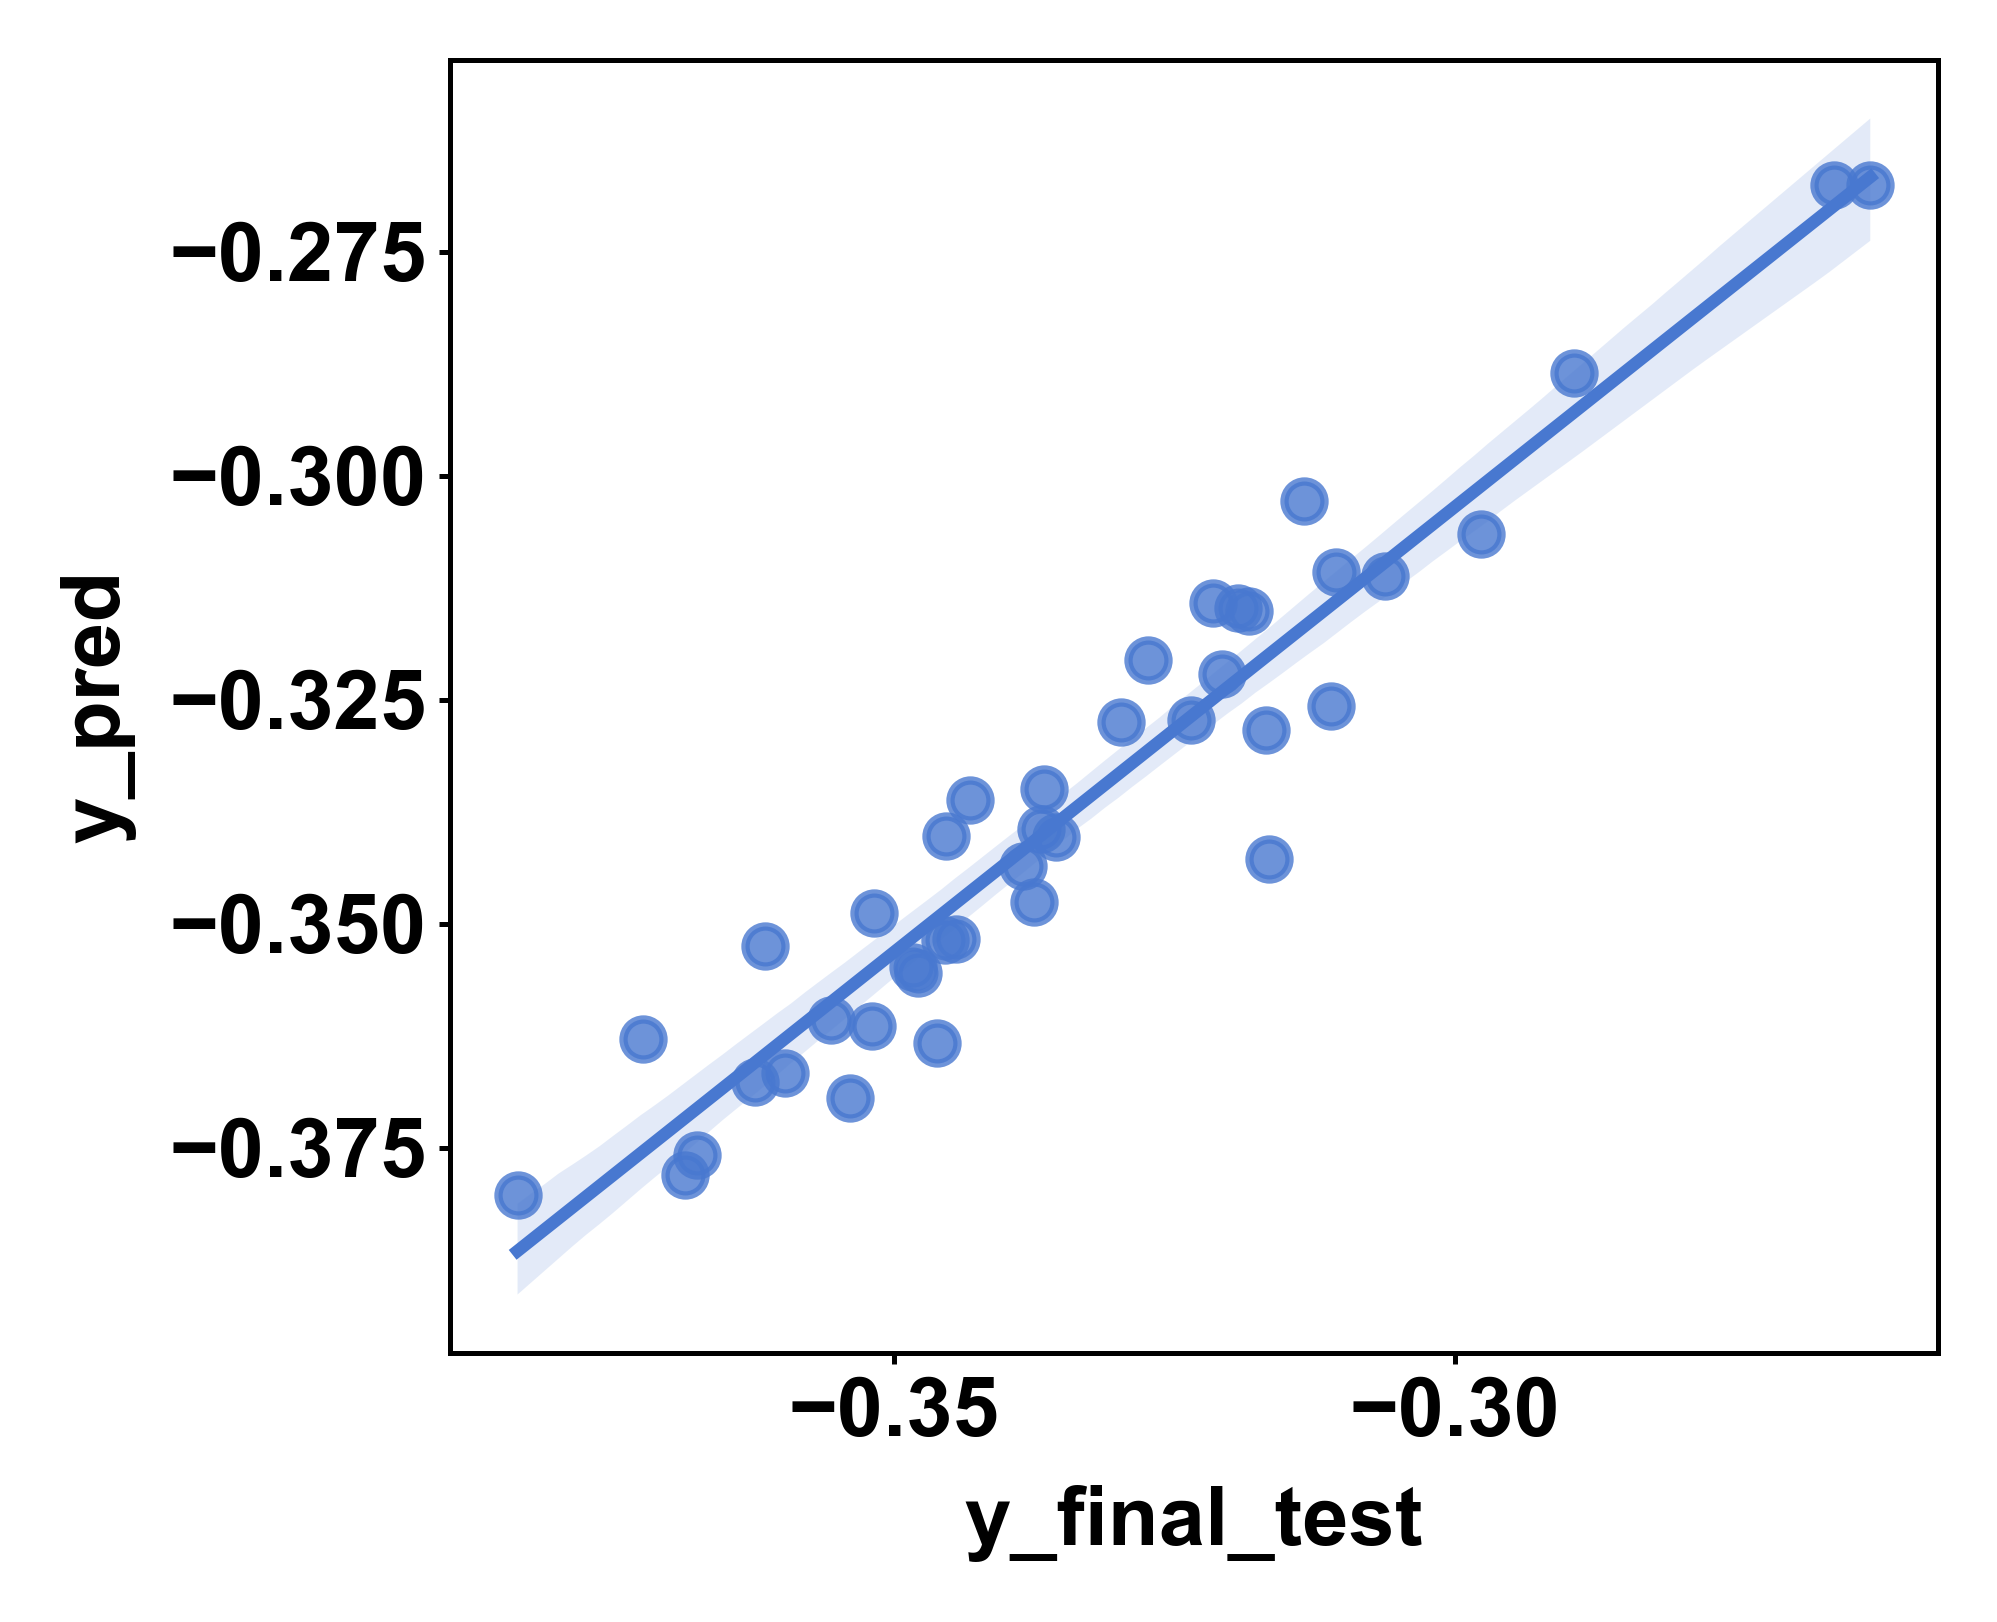

In [18]:

y_final_test_best_pred=XGB_best.predict(X_final_test_standard_best)


x_best_3,y_best_3=pd.Series(y_final_test_np,name='y_final_test'),pd.Series(y_final_test_best_pred,name='y_pred')
sns.regplot(x=x_best_3,y=y_best_3)
plt.show

rmse = np.sqrt(mean_squared_error(y_final_test_np,y_final_test_best_pred))
r2 = r2_score(y_final_test_np,y_final_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_final_test_np,y_final_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)